WeatherPyLg

   Looking at scatterplot and linear regression for different weather variables against lattitude shows several features.  Most noteably is the further from lattitude of zero (equator), the lower the temperatures.  Since the air is mostly warmed via solar radiation and the earth titlts its axis to the sun across the equator, the equatorial regions see more sun and therefore more heat.  Further, it is currently summer in the northern hemisphere*', meaning the sun is 'above the equator', creating warmer air north of the equator.
  As far as the other variables (wind speed, humidity, and cloud cover) are concerned, there does not appear to be any causation that the distance from the equator, either north or south, has any affect on them.  Although there are some noticeable differences between the northern and southern hemispheres, in general they should even out with a larger sampling across various points in time as weather conditions move and change.  Figure 10 in section 17 does show a regression line suggesting it would be cloudier further south of the equator, though the data points on the underlying scatter plot do not suggest an actual relationship.


*' code has been rerun on 5/11/2021, where it is currently spring in the northern hemisphere.

In [1]:
%matplotlib notebook
#############################################################
#00       I/O                                               #
#   a- import libraries and api key.                        #
#   b- associate output file to variable.                   #
#   c- set lat & lng parameter for call to np in step 01.   #
#############################################################

#a
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
from citipy import citipy
import json
from api_keys import weather_api_key
import datetime as dt

# b
output_data_file = "output_data/cities.csv"

#c
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#######################################################
#01        CityList                                   #
#   a- get random lat and long coordinates from np.   #
#   b- call citypy with coords, get nearest city,     #
#      add to cities list if new.                     #
#   c- verify at least 500 cities via print.          #
#######################################################

#a
lat_lngs = []
cities = []
countries = []

lats = np.random.uniform(lat_range[0], lat_range[1], size=15000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=15000)
lat_lngs = zip(lats, lngs)

#b
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
#c
print(len(cities))

2907


In [3]:
##############################################################################
#02        Fill Dataframe                                                    #
#   a- create df from cities, add fields to populate.                        # 
#   b- set up url base for calls to openweather.                             #
#     - create list for indexes, to delete if no weather records for city.   #
#     - subtract utc offset from utc epoch time, convert, add to df.         #         
#   c- retrieve info for each city, populate df.                             #
#   d- delete cities from df if no weather records, check remaining count.   #
##############################################################################

#a
city_weather = pd.DataFrame({"city": cities})
city_weather["temp"] = ""
city_weather["humid"] = ""
city_weather["wind"] = ""
city_weather["clouds"] = ""
city_weather["lat"] = ""
city_weather["lng"] = ""
city_weather["maxtemp"] = ""
city_weather["country"] = ""
city_weather["local_date_time"] = ""

#b
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
del_indexes = []

#c
for x, row in city_weather.iterrows():
    print("*" * 55)
    current_city = city_weather["city"][x]
    print(f"checking openweather for city number {x+1} : {current_city}")
    response = requests.get(query_url + row["city"]).json()
    
    try:
        city_weather.loc[x, "temp"] = response["main"]["temp"]
        city_weather.loc[x, "humid"] = response["main"]["humidity"]
        city_weather.loc[x, "wind"] = response["wind"]["speed"]
        city_weather.loc[x, "clouds"] = response["clouds"]["all"]                 
        city_weather.loc[x, "lat"] = response["coord"]["lat"]
        city_weather.loc[x, "lng"] = response["coord"]["lon"]
        city_weather.loc[x, "maxtemp"] = response["main"]["temp_max"]
        city_weather.loc[x, "country"] = response["sys"]["country"]
        utc_off = response["timezone"]                            # local time offset in seconds from UTC
        utc_time = response["dt"]                                 # current UTC in epoch time
        local_time_epoch = utc_time + utc_off
        local_time = dt.datetime.fromtimestamp(local_time_epoch)  # retrieve fomatted gregorian date and time from epoch
        city_weather.loc[x, "local_date_time"] = local_time  
                
    except (KeyError):
        print('\033[91m' + "*** No Weather Record, removing from file ***" + '\033[0m')
        del_indexes.append(x)
    except (IndexError):
        print('\033[91m' + "*** Index Error, removing from file ***" + '\033[0m')
        del_indexes.append(x)
#d
if len(del_indexes) > 0:
    city_weather.drop(del_indexes, inplace=True)
    city_weather.reset_index(inplace=True, drop=True)
    if len(city_weather) < 500:
        print('\033[91m' + "WARNING!!  Number of cities left = " + str(len(city_weather)) + '\033[0m')
    else:
        print(f"number of cities left = {len(city_weather)}")

*******************************************************
checking openweather for city number 1 : qaanaaq
*******************************************************
checking openweather for city number 2 : tuatapere
*******************************************************
checking openweather for city number 3 : doha
*******************************************************
checking openweather for city number 4 : rikitea
*******************************************************
checking openweather for city number 5 : attawapiskat
*** No Weather Record, removing from file ***
*******************************************************
checking openweather for city number 6 : busselton
*******************************************************
checking openweather for city number 7 : saint george
*******************************************************
checking openweather for city number 8 : hamilton
*******************************************************
checking openweather for city number 9 : esper

*******************************************************
checking openweather for city number 73 : nikolskoye
*******************************************************
checking openweather for city number 74 : kyra
*******************************************************
checking openweather for city number 75 : dikson
*******************************************************
checking openweather for city number 76 : mys shmidta
*** No Weather Record, removing from file ***
*******************************************************
checking openweather for city number 77 : saldanha
*******************************************************
checking openweather for city number 78 : albany
*******************************************************
checking openweather for city number 79 : eirunepe
*******************************************************
checking openweather for city number 80 : tombouctou
*******************************************************
checking openweather for city number 81 : b

*******************************************************
checking openweather for city number 146 : barrow
*******************************************************
checking openweather for city number 147 : sao filipe
*******************************************************
checking openweather for city number 148 : kisangani
*******************************************************
checking openweather for city number 149 : ponta do sol
*******************************************************
checking openweather for city number 150 : provideniya
*******************************************************
checking openweather for city number 151 : nizhneyansk
*** No Weather Record, removing from file ***
*******************************************************
checking openweather for city number 152 : namatanai
*******************************************************
checking openweather for city number 153 : luau
*******************************************************
checking openweather for c

*******************************************************
checking openweather for city number 219 : denpasar
*******************************************************
checking openweather for city number 220 : igrim
*******************************************************
checking openweather for city number 221 : wageningen
*******************************************************
checking openweather for city number 222 : slave lake
*******************************************************
checking openweather for city number 223 : mehamn
*******************************************************
checking openweather for city number 224 : itarema
*******************************************************
checking openweather for city number 225 : langarud
*******************************************************
checking openweather for city number 226 : san juan
*******************************************************
checking openweather for city number 227 : miramar
*******************************

*******************************************************
checking openweather for city number 293 : urubicha
*******************************************************
checking openweather for city number 294 : turkan
*******************************************************
checking openweather for city number 295 : anchorage
*******************************************************
checking openweather for city number 296 : beira
*******************************************************
checking openweather for city number 297 : chulym
*******************************************************
checking openweather for city number 298 : louisbourg
*** No Weather Record, removing from file ***
*******************************************************
checking openweather for city number 299 : matagami
*******************************************************
checking openweather for city number 300 : kannad
*******************************************************
checking openweather for city number 301

*******************************************************
checking openweather for city number 367 : hami
*******************************************************
checking openweather for city number 368 : port hawkesbury
*******************************************************
checking openweather for city number 369 : svetlaya
*******************************************************
checking openweather for city number 370 : katherine
*******************************************************
checking openweather for city number 371 : evensk
*******************************************************
checking openweather for city number 372 : sola
*******************************************************
checking openweather for city number 373 : praia da vitoria
*******************************************************
checking openweather for city number 374 : yatou
*******************************************************
checking openweather for city number 375 : tsihombe
*** No Weather Record, re

*******************************************************
checking openweather for city number 438 : qui nhon
*******************************************************
checking openweather for city number 439 : sobolevo
*******************************************************
checking openweather for city number 440 : abu samrah
*******************************************************
checking openweather for city number 441 : coihaique
*******************************************************
checking openweather for city number 442 : zelenoborskiy
*******************************************************
checking openweather for city number 443 : kupang
*******************************************************
checking openweather for city number 444 : brae
*******************************************************
checking openweather for city number 445 : simpang empat
*******************************************************
checking openweather for city number 446 : san quintin
******************

*******************************************************
checking openweather for city number 511 : shitanjing
*******************************************************
checking openweather for city number 512 : nogliki
*******************************************************
checking openweather for city number 513 : hauterive
*******************************************************
checking openweather for city number 514 : maniitsoq
*******************************************************
checking openweather for city number 515 : kampong thum
*******************************************************
checking openweather for city number 516 : guane
*******************************************************
checking openweather for city number 517 : japura
*******************************************************
checking openweather for city number 518 : hajnowka
*******************************************************
checking openweather for city number 519 : ketchikan
*************************

*******************************************************
checking openweather for city number 585 : san andres
*******************************************************
checking openweather for city number 586 : belaya gora
*******************************************************
checking openweather for city number 587 : tandil
*******************************************************
checking openweather for city number 588 : acari
*******************************************************
checking openweather for city number 589 : honiara
*******************************************************
checking openweather for city number 590 : valea ursului
*******************************************************
checking openweather for city number 591 : excelsior springs
*******************************************************
checking openweather for city number 592 : gamba
*******************************************************
checking openweather for city number 593 : pangai
********************

*******************************************************
checking openweather for city number 660 : manuk mangkaw
*******************************************************
checking openweather for city number 661 : sur
*******************************************************
checking openweather for city number 662 : cockburn town
*******************************************************
checking openweather for city number 663 : saint-denis
*******************************************************
checking openweather for city number 664 : laguna
*******************************************************
checking openweather for city number 665 : wau
*******************************************************
checking openweather for city number 666 : byron bay
*******************************************************
checking openweather for city number 667 : batagay
*******************************************************
checking openweather for city number 668 : ostroh
*****************************

*******************************************************
checking openweather for city number 736 : watertown
*******************************************************
checking openweather for city number 737 : nguiu
*** No Weather Record, removing from file ***
*******************************************************
checking openweather for city number 738 : cabinda
*******************************************************
checking openweather for city number 739 : wasilla
*******************************************************
checking openweather for city number 740 : kortkeros
*******************************************************
checking openweather for city number 741 : mitu
*******************************************************
checking openweather for city number 742 : kismayo
*******************************************************
checking openweather for city number 743 : kibre mengist
*******************************************************
checking openweather for city number 

*******************************************************
checking openweather for city number 809 : lapua
*******************************************************
checking openweather for city number 810 : north bend
*******************************************************
checking openweather for city number 811 : kiunga
*******************************************************
checking openweather for city number 812 : daru
*******************************************************
checking openweather for city number 813 : antofagasta
*******************************************************
checking openweather for city number 814 : cap-aux-meules
*******************************************************
checking openweather for city number 815 : ust-bolsheretsk
*** No Weather Record, removing from file ***
*******************************************************
checking openweather for city number 816 : smirnykh
*******************************************************
checking openweather for 

*******************************************************
checking openweather for city number 882 : grafton
*******************************************************
checking openweather for city number 883 : at-bashi
*******************************************************
checking openweather for city number 884 : bababe
*** No Weather Record, removing from file ***
*******************************************************
checking openweather for city number 885 : pell city
*******************************************************
checking openweather for city number 886 : kozhva
*******************************************************
checking openweather for city number 887 : toulouse
*******************************************************
checking openweather for city number 888 : wenchi
*******************************************************
checking openweather for city number 889 : madang
*******************************************************
checking openweather for city number 890 :

*******************************************************
checking openweather for city number 958 : chipiona
*******************************************************
checking openweather for city number 959 : alekseyevskaya
*******************************************************
checking openweather for city number 960 : kieta
*******************************************************
checking openweather for city number 961 : lahaina
*******************************************************
checking openweather for city number 962 : ranau
*******************************************************
checking openweather for city number 963 : vanimo
*******************************************************
checking openweather for city number 964 : panukulan
*******************************************************
checking openweather for city number 965 : paragould
*******************************************************
checking openweather for city number 966 : nayoro
*******************************

*******************************************************
checking openweather for city number 1034 : gimli
*******************************************************
checking openweather for city number 1035 : ust-kuyga
*******************************************************
checking openweather for city number 1036 : trincomalee
*******************************************************
checking openweather for city number 1037 : anadyr
*******************************************************
checking openweather for city number 1038 : akdepe
*******************************************************
checking openweather for city number 1039 : mokhsogollokh
*******************************************************
checking openweather for city number 1040 : praya
*******************************************************
checking openweather for city number 1041 : meyungs
*** No Weather Record, removing from file ***
*******************************************************
checking openweather for cit

*******************************************************
checking openweather for city number 1106 : mogadouro
*******************************************************
checking openweather for city number 1107 : boston
*******************************************************
checking openweather for city number 1108 : pearl
*******************************************************
checking openweather for city number 1109 : muisne
*******************************************************
checking openweather for city number 1110 : mana
*******************************************************
checking openweather for city number 1111 : kjollefjord
*******************************************************
checking openweather for city number 1112 : mayor pablo lagerenza
*******************************************************
checking openweather for city number 1113 : naron
*******************************************************
checking openweather for city number 1114 : eyl
*********************

*******************************************************
checking openweather for city number 1179 : olafsvik
*******************************************************
checking openweather for city number 1180 : atbasar
*******************************************************
checking openweather for city number 1181 : fevik
*******************************************************
checking openweather for city number 1182 : mizur
*******************************************************
checking openweather for city number 1183 : clarence town
*******************************************************
checking openweather for city number 1184 : senno
*******************************************************
checking openweather for city number 1185 : karachi
*******************************************************
checking openweather for city number 1186 : grand island
*******************************************************
checking openweather for city number 1187 : kirksville
*******************

*******************************************************
checking openweather for city number 1252 : dawei
*******************************************************
checking openweather for city number 1253 : sahuaripa
*******************************************************
checking openweather for city number 1254 : kandiari
*******************************************************
checking openweather for city number 1255 : sao gabriel
*******************************************************
checking openweather for city number 1256 : smithers
*******************************************************
checking openweather for city number 1257 : ariquemes
*******************************************************
checking openweather for city number 1258 : roma
*******************************************************
checking openweather for city number 1259 : rock springs
*******************************************************
checking openweather for city number 1260 : nizhniy ingash
***********

*******************************************************
checking openweather for city number 1328 : omsukchan
*******************************************************
checking openweather for city number 1329 : ucluelet
*******************************************************
checking openweather for city number 1330 : paucartambo
*** No Weather Record, removing from file ***
*******************************************************
checking openweather for city number 1331 : samalaeulu
*** No Weather Record, removing from file ***
*******************************************************
checking openweather for city number 1332 : loukhi
*******************************************************
checking openweather for city number 1333 : mgachi
*******************************************************
checking openweather for city number 1334 : kokkola
*******************************************************
checking openweather for city number 1335 : svetlogorsk
********************************

*******************************************************
checking openweather for city number 1401 : uttaradit
*******************************************************
checking openweather for city number 1402 : lerwick
*******************************************************
checking openweather for city number 1403 : luanda
*******************************************************
checking openweather for city number 1404 : mollendo
*******************************************************
checking openweather for city number 1405 : richard toll
*** No Weather Record, removing from file ***
*******************************************************
checking openweather for city number 1406 : enshi
*******************************************************
checking openweather for city number 1407 : leon
*******************************************************
checking openweather for city number 1408 : male
*******************************************************
checking openweather for city numbe

*******************************************************
checking openweather for city number 1476 : iracoubo
*******************************************************
checking openweather for city number 1477 : kralendijk
*******************************************************
checking openweather for city number 1478 : sydney
*******************************************************
checking openweather for city number 1479 : levokumskoye
*******************************************************
checking openweather for city number 1480 : lincoln
*******************************************************
checking openweather for city number 1481 : bhimunipatnam
*******************************************************
checking openweather for city number 1482 : praia
*******************************************************
checking openweather for city number 1483 : berwick
*******************************************************
checking openweather for city number 1484 : bridlington
************

*******************************************************
checking openweather for city number 1548 : juneau
*******************************************************
checking openweather for city number 1549 : segovia
*******************************************************
checking openweather for city number 1550 : saurimo
*******************************************************
checking openweather for city number 1551 : glogova
*******************************************************
checking openweather for city number 1552 : santa barbara
*******************************************************
checking openweather for city number 1553 : vacaria
*******************************************************
checking openweather for city number 1554 : tecolutla
*******************************************************
checking openweather for city number 1555 : sungairaya
*******************************************************
checking openweather for city number 1556 : mgandu
*******************

*******************************************************
checking openweather for city number 1621 : patacamaya
*******************************************************
checking openweather for city number 1622 : hatta
*******************************************************
checking openweather for city number 1623 : ambanja
*******************************************************
checking openweather for city number 1624 : dali
*******************************************************
checking openweather for city number 1625 : chenzhou
*******************************************************
checking openweather for city number 1626 : quang ngai
*******************************************************
checking openweather for city number 1627 : tarragona
*******************************************************
checking openweather for city number 1628 : casas grandes
*******************************************************
checking openweather for city number 1629 : sotnikovskoye
************

*******************************************************
checking openweather for city number 1694 : birin
*******************************************************
checking openweather for city number 1695 : rayachoti
*******************************************************
checking openweather for city number 1696 : saint stephen
*******************************************************
checking openweather for city number 1697 : tiarei
*******************************************************
checking openweather for city number 1698 : prado
*******************************************************
checking openweather for city number 1699 : abay
*******************************************************
checking openweather for city number 1700 : rassvet
*******************************************************
checking openweather for city number 1701 : burica
*** No Weather Record, removing from file ***
*******************************************************
checking openweather for city numbe

*******************************************************
checking openweather for city number 1768 : ouro preto do oeste
*******************************************************
checking openweather for city number 1769 : temiscaming
*******************************************************
checking openweather for city number 1770 : barahona
*******************************************************
checking openweather for city number 1771 : majene
*******************************************************
checking openweather for city number 1772 : borujan
*** No Weather Record, removing from file ***
*******************************************************
checking openweather for city number 1773 : boende
*******************************************************
checking openweather for city number 1774 : northam
*******************************************************
checking openweather for city number 1775 : arona
*******************************************************
checking openweather 

*******************************************************
checking openweather for city number 1839 : caucaia
*******************************************************
checking openweather for city number 1840 : rena
*******************************************************
checking openweather for city number 1841 : vradiyivka
*******************************************************
checking openweather for city number 1842 : wajima
*******************************************************
checking openweather for city number 1843 : maryborough
*******************************************************
checking openweather for city number 1844 : upata
*******************************************************
checking openweather for city number 1845 : boulder
*******************************************************
checking openweather for city number 1846 : koslan
*******************************************************
checking openweather for city number 1847 : kyshtovka
**************************

*******************************************************
checking openweather for city number 1914 : kresttsy
*******************************************************
checking openweather for city number 1915 : tongsa
*** No Weather Record, removing from file ***
*******************************************************
checking openweather for city number 1916 : ovalle
*******************************************************
checking openweather for city number 1917 : emba
*******************************************************
checking openweather for city number 1918 : piterka
*******************************************************
checking openweather for city number 1919 : cabo rojo
*******************************************************
checking openweather for city number 1920 : talikota
*******************************************************
checking openweather for city number 1921 : krasnaya zarya
*******************************************************
checking openweather for cit

*******************************************************
checking openweather for city number 1989 : changli
*******************************************************
checking openweather for city number 1990 : ayorou
*******************************************************
checking openweather for city number 1991 : black river
*******************************************************
checking openweather for city number 1992 : sao jose da coroa grande
*******************************************************
checking openweather for city number 1993 : abashiri
*******************************************************
checking openweather for city number 1994 : urumqi
*******************************************************
checking openweather for city number 1995 : martapura
*******************************************************
checking openweather for city number 1996 : oistins
*******************************************************
checking openweather for city number 1997 : cheremkhovo
**

*******************************************************
checking openweather for city number 2063 : dahra
*******************************************************
checking openweather for city number 2064 : odweyne
*******************************************************
checking openweather for city number 2065 : alakurtti
*******************************************************
checking openweather for city number 2066 : gigante
*******************************************************
checking openweather for city number 2067 : mweka
*******************************************************
checking openweather for city number 2068 : umri
*******************************************************
checking openweather for city number 2069 : pinega
*******************************************************
checking openweather for city number 2070 : tachi
*** No Weather Record, removing from file ***
*******************************************************
checking openweather for city number 2071 

*******************************************************
checking openweather for city number 2135 : dustlik
*******************************************************
checking openweather for city number 2136 : edea
*******************************************************
checking openweather for city number 2137 : bintulu
*******************************************************
checking openweather for city number 2138 : payo
*******************************************************
checking openweather for city number 2139 : waitati
*******************************************************
checking openweather for city number 2140 : borogontsy
*******************************************************
checking openweather for city number 2141 : bolu
*******************************************************
checking openweather for city number 2142 : brestovat
*** No Weather Record, removing from file ***
*******************************************************
checking openweather for city number 2

*******************************************************
checking openweather for city number 2208 : trondheim
*******************************************************
checking openweather for city number 2209 : san ramon
*******************************************************
checking openweather for city number 2210 : bolivar
*******************************************************
checking openweather for city number 2211 : senador guiomard
*******************************************************
checking openweather for city number 2212 : myaundzha
*******************************************************
checking openweather for city number 2213 : ulu-telyak
*******************************************************
checking openweather for city number 2214 : kuandian
*******************************************************
checking openweather for city number 2215 : strezhevoy
*******************************************************
checking openweather for city number 2216 : forest lake
**

*******************************************************
checking openweather for city number 2282 : monreal
*******************************************************
checking openweather for city number 2283 : maturin
*******************************************************
checking openweather for city number 2284 : tres arroyos
*******************************************************
checking openweather for city number 2285 : voi
*******************************************************
checking openweather for city number 2286 : greeneville
*******************************************************
checking openweather for city number 2287 : mirpur khas
*******************************************************
checking openweather for city number 2288 : kurgan
*******************************************************
checking openweather for city number 2289 : rockhampton
*******************************************************
checking openweather for city number 2290 : danjiangkou
************

*******************************************************
checking openweather for city number 2355 : vorotynets
*******************************************************
checking openweather for city number 2356 : hede
*******************************************************
checking openweather for city number 2357 : nampa
*******************************************************
checking openweather for city number 2358 : vlakhokerasea
*** No Weather Record, removing from file ***
*******************************************************
checking openweather for city number 2359 : tall kayf
*******************************************************
checking openweather for city number 2360 : ciudad del maiz
*******************************************************
checking openweather for city number 2361 : bosobolo
*******************************************************
checking openweather for city number 2362 : armidale
*******************************************************
checking openweath

*******************************************************
checking openweather for city number 2430 : uporovo
*******************************************************
checking openweather for city number 2431 : meiganga
*******************************************************
checking openweather for city number 2432 : lengshuijiang
*******************************************************
checking openweather for city number 2433 : plouzane
*******************************************************
checking openweather for city number 2434 : saint marys
*******************************************************
checking openweather for city number 2435 : imeni poliny osipenko
*******************************************************
checking openweather for city number 2436 : sarahan
*******************************************************
checking openweather for city number 2437 : tongliao
*******************************************************
checking openweather for city number 2438 : almaty
**

*******************************************************
checking openweather for city number 2504 : yellandu
*******************************************************
checking openweather for city number 2505 : anqing
*******************************************************
checking openweather for city number 2506 : bexhill
*******************************************************
checking openweather for city number 2507 : kizhinga
*******************************************************
checking openweather for city number 2508 : mpongwe
*******************************************************
checking openweather for city number 2509 : rathenow
*******************************************************
checking openweather for city number 2510 : sosnovo-ozerskoye
*******************************************************
checking openweather for city number 2511 : antonovo
*******************************************************
checking openweather for city number 2512 : horsham
***************

*******************************************************
checking openweather for city number 2579 : tukrah
*******************************************************
checking openweather for city number 2580 : jacksonville
*******************************************************
checking openweather for city number 2581 : uchiza
*******************************************************
checking openweather for city number 2582 : wattegama
*******************************************************
checking openweather for city number 2583 : sao joao del rei
*******************************************************
checking openweather for city number 2584 : novogornyy
*******************************************************
checking openweather for city number 2585 : manicore
*******************************************************
checking openweather for city number 2586 : pavilosta
*******************************************************
checking openweather for city number 2587 : tupik
**********

*******************************************************
checking openweather for city number 2653 : cintalapa
*******************************************************
checking openweather for city number 2654 : shieli
*******************************************************
checking openweather for city number 2655 : ndjole
*******************************************************
checking openweather for city number 2656 : kuytun
*******************************************************
checking openweather for city number 2657 : panjab
*******************************************************
checking openweather for city number 2658 : kavos
*******************************************************
checking openweather for city number 2659 : zhengjiatun
*******************************************************
checking openweather for city number 2660 : bocana de paiwas
*******************************************************
checking openweather for city number 2661 : ust-tsilma
****************

*******************************************************
checking openweather for city number 2726 : remedios
*******************************************************
checking openweather for city number 2727 : beinamar
*******************************************************
checking openweather for city number 2728 : mogocha
*******************************************************
checking openweather for city number 2729 : jalingo
*******************************************************
checking openweather for city number 2730 : miyoshi
*******************************************************
checking openweather for city number 2731 : kelvington
*******************************************************
checking openweather for city number 2732 : mto wa mbu
*******************************************************
checking openweather for city number 2733 : amalapuram
*******************************************************
checking openweather for city number 2734 : hadejia
*****************

*******************************************************
checking openweather for city number 2799 : goundam
*******************************************************
checking openweather for city number 2800 : bangui
*******************************************************
checking openweather for city number 2801 : ojinaga
*******************************************************
checking openweather for city number 2802 : iwanai
*******************************************************
checking openweather for city number 2803 : xapuri
*******************************************************
checking openweather for city number 2804 : nsanje
*******************************************************
checking openweather for city number 2805 : brokopondo
*******************************************************
checking openweather for city number 2806 : chicaman
*******************************************************
checking openweather for city number 2807 : semnan
*****************************

*******************************************************
checking openweather for city number 2872 : furtwangen
*******************************************************
checking openweather for city number 2873 : sistranda
*******************************************************
checking openweather for city number 2874 : bac can
*** No Weather Record, removing from file ***
*******************************************************
checking openweather for city number 2875 : popondetta
*******************************************************
checking openweather for city number 2876 : karamursel
*******************************************************
checking openweather for city number 2877 : tateyama
*******************************************************
checking openweather for city number 2878 : phalia
*******************************************************
checking openweather for city number 2879 : koygorodok
*******************************************************
checking openweather

In [4]:
#######################################################
#03        Outfile                                    #
#   write complete df to csv file and display head.   # 
#######################################################

city_weather.to_csv(output_data_file, index=False, header=True)
city_weather.head(5)

,city,temp,humid,wind,clouds,lat,lng,maxtemp,country,local_date_time
0,qaanaaq,20.97,74,7.23,100,77.484,-69.3632,20.97,GL,2021-05-11 09:07:55
1,tuatapere,37,86,1.99,86,-46.1333,167.683,37,NZ,2021-05-12 00:07:55
2,doha,91.6,31,5.75,0,25.2867,51.5333,91.99,QA,2021-05-11 15:06:10
3,rikitea,78.19,76,24.4,81,-23.1203,-134.969,78.19,PF,2021-05-11 03:02:59
4,busselton,62.38,94,6.38,82,-33.65,115.333,63,AU,2021-05-11 20:03:02


## Inspect the data and remove the cities where the humidity > 100%.

In [5]:
###############################################################
#04        Clean Data                                         #
#   a- sort df by humid and check if top record is gt 100.    # 
#   b- create clean df, dropping any humidities gt 100.       # 
#   c- check clean df len, write warning if lt 500 records.   #
###############################################################

#a
del_indexes2 =[]
city_weather.sort_values("humid",inplace=True,ascending=False)
city_weather.reset_index(inplace=True, drop=True)
if city_weather["humid"][0] > 100:
    del_indexes2 = city_weather[city_weather["humid"] > 100].index

#b
clean_city_weather = city_weather.drop(del_indexes2, inplace=False)
clean_city_weather.reset_index(inplace=True,drop=True)
    
#c    
if len(clean_city_weather) < 500:
    print('\033[91m' + "WARNING!!  Number of cities left = " + str(len(clean_city_weather)) + '\033[0m')
else:
    print(f"number of cities left = {len(clean_city_weather)}")

number of cities left = 2699


## Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


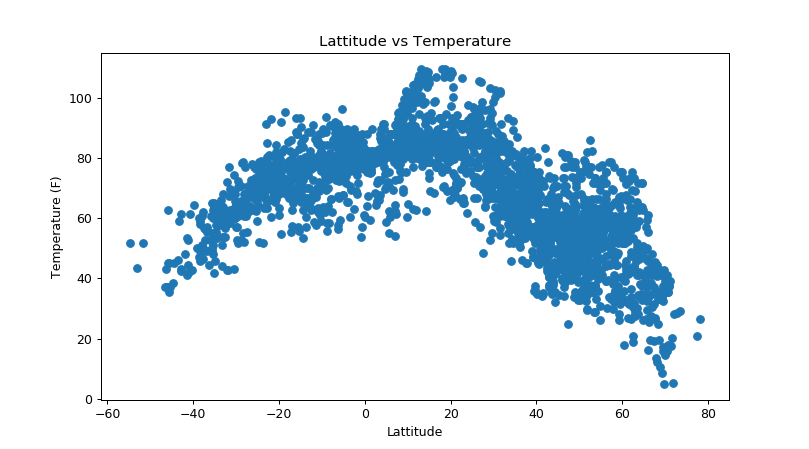

In [6]:
####################################################
#05    ScatterPlot-1 Lat v Temp                    #
#  a- scatterplot lattitude against temperature.   #
#  b- save image to png file.                      #
####################################################

#a
plt.figure(figsize=(9,5))
plt.scatter(clean_city_weather["lat"],clean_city_weather["temp"])
plt.xlabel("Lattitude")
plt.ylabel("Temperature (F)")
plt.title("Lattitude vs Temperature")
plt.show()

#b
plt.savefig("output_data/lat_vs_temp.png")

The relationship between lattitude and temperature shows an increase in temperature approaching zero degrees lattitude from both the positive and negative sides, as well as higher temperatures away from zero towards the positive.  This is to be expected as the equator (zero degrees lat) receives the most amount of sun.  Also, as it is currently summer in the northern hemisphere (positive lat) we see slighlty higher temperatures to the right of zero as compared to the left (where it is currently winter).

## Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


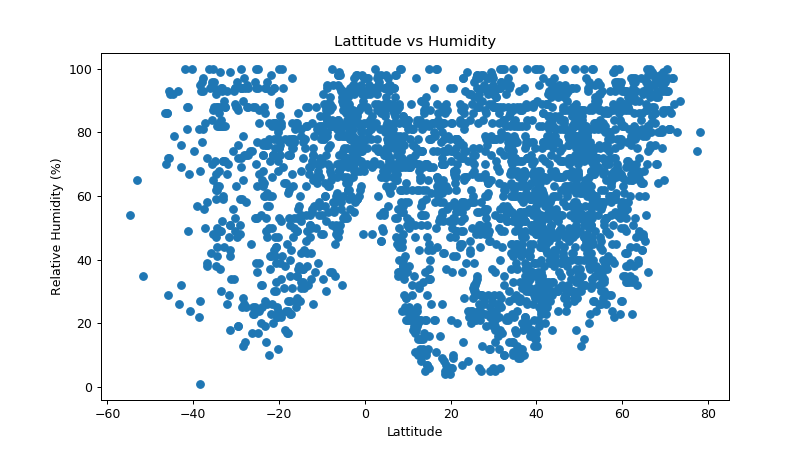

In [7]:
#################################################
#06    ScatterPlot-2 Lat v Humidity             #
#  a- scatterplot lattitude against humidity.   #
#  b- save image to png file.                   #
#################################################

#a
plt.figure(figsize=(9,5))
plt.scatter(clean_city_weather["lat"],clean_city_weather["humid"])
plt.xlabel("Lattitude")
plt.ylabel("Relative Humidity (%)")
plt.title("Lattitude vs Humidity")
plt.show()

#b
plt.savefig("output_data/lat_vs_humid.png")

Comparing lattitude to relative humidity levels shows no real trend. We do see some empty patches of low humidity levels and minor clustering of higher levels but nothing appears related to lattitude.
5/1/21 With a larger data set it is more evident that a trend of higher humidity can be confirmed nearest the equator.

## Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


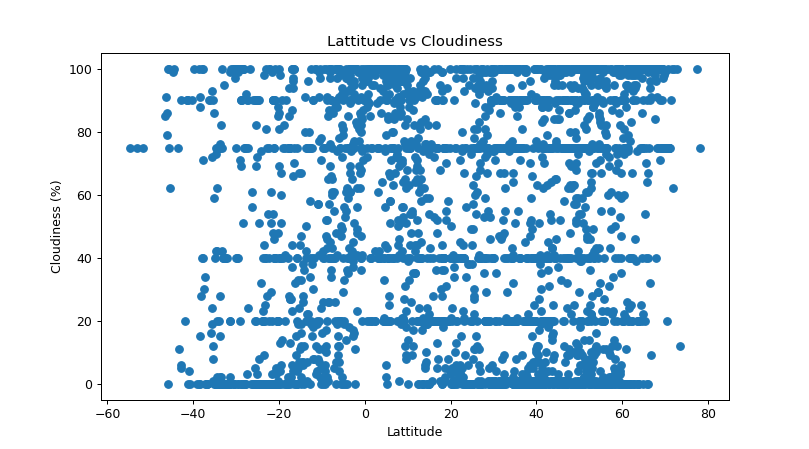

In [8]:
###################################################
#07    ScatterPlot-3 Lat v Cloudiness             #
#  a- scatterplot lattitude against cloudiness.   #
#  b- save image to png file.                     #
###################################################

#a
plt.figure(figsize=(9,5))
plt.scatter(clean_city_weather["lat"],clean_city_weather["clouds"])
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)")
plt.title("Lattitude vs Cloudiness")
plt.show()

#b
plt.savefig("output_data/lat_vs_clouds.png")

There is no visible relationship between lattitude and cloudiness.  There does appear to be horizontal bands of certain cloud cover percentages, with heavier clustering at the extremes. 
5/11/21 - same bands are even more evident (0, 20, 40, 75, 90, and 100 percent cloudiness).

## Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


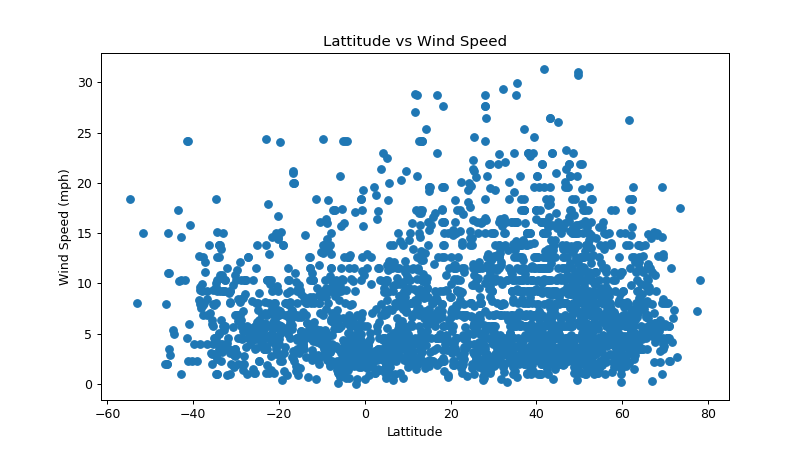

In [9]:
###################################################
#08    ScatterPlot-4 Lat v Wind Speed             #
#  a- scatterplot lattitude against wind speed.   #
#  b- save image to png file.                     #
###################################################

#a
plt.figure(figsize=(9,5))
plt.scatter(clean_city_weather["lat"],clean_city_weather["wind"])
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Lattitude vs Wind Speed")
plt.show()

#b
plt.savefig("output_data/lat_vs_wind.png")

Looking at lattitude vs windspeed shows no relationship.  We do see that at the moment of this extraction global wind speeds are generally low for this sample,

## Linear Regression

In [10]:
##############################################################################################
# 10     LinePlot Function (lineplot)                                                        #
#          > Creates scatterplot, linear regression, or line over scatterplot graph.         #
#   Positional Inputs[Required]: x-axis, y-axis= x and y coordinates for data points.        #
#        xy = tuple with x and y coordinates to annotate slope-intercept formula.            #
#   Keyword Inputs[Optional]: title- title for the graph,  x_label & y_label- axes labels,   #
#        type = "line" - produces linear regression graph only.                              #
#        type = "plot" - produces scatter plot graph only.                                   #
#        type = "both" (or any value not "line" or "plot") - produces line over scatter.     #
#                                                                                            #
#   a- ensure axes are lists for scipy call, set title and labels.                           #
#   b- if not line graph only, produce scatterplot, exit if plot only.                       #
#   c- call scipy linregress() for regression line variables, create regression line.        #
#   d- create linear regression chart.                                                       #
##############################################################################################

def lineplot (xparm,yparm,xy,title="",x_label="",y_label="",type="both"):
#a    
    x_axis = list(xparm) 
    y_axis = list(yparm)
    plt.figure(figsize=(9,5))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

#b    
    if type != "line":
        plt.scatter(x_axis,y_axis)
        plt.show()
        if type == "plot":
            return
#c        
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis,y_axis)
    regress_line = slope * np.asarray(x_axis) + intercept    # convert sequence to array for floatpoint *
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
#d     
    plt.plot(x_axis, regress_line,"r-")
    plt.annotate(line_eq,xy,fontsize=12,color="r")
    plt.show()

In [11]:
#########################################
#11    Hemisphere df's                  # 
#   a- create northern hemisphere df.   #
#   b- create southern hemisphere df.   #
#########################################

#a
north_city_weather = clean_city_weather[clean_city_weather["lat"] >= 0]
print(f"Number of cities in Northern Hemispher : {len(north_city_weather)}")

#b
south_city_weather = clean_city_weather[clean_city_weather["lat"] < 0]
print(f"Number of cities in Southern Hemispher : {len(south_city_weather)}")

Number of cities in Northern Hemispher : 2011
Number of cities in Southern Hemispher : 688


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


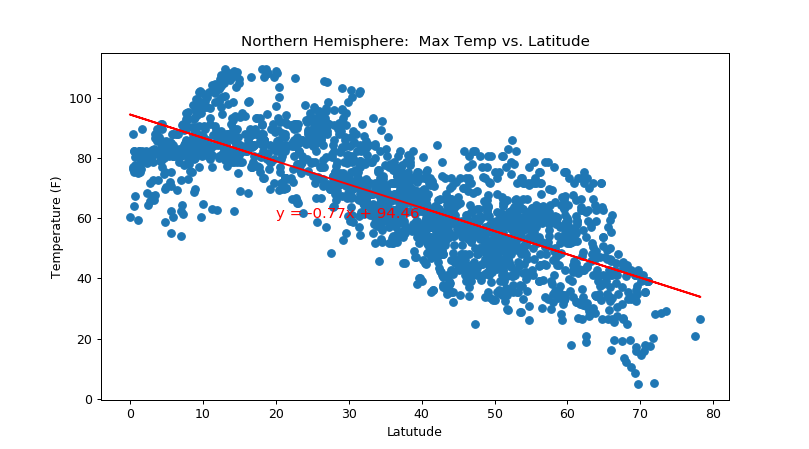

In [12]:
#############################################
#12  Regression1 North lat vs Maxtemp       # 
#   a- set datapoints, title, and labels.   #
#   b- call lineplot() to produce graph.    #
#############################################

#a
x12 = north_city_weather["lat"]
y12 = north_city_weather["maxtemp"]
title12 = "Northern Hemisphere:  Max Temp vs. Latitude"
xlabel12 = "Latutude"
ylabel12 = "Temperature (F)"
xy12 = (20,60)

#b
lineplot(x12, y12, xy12, title=title12, x_label=xlabel12, y_label=ylabel12, type="both")
plt.savefig("output_data/north_lat_vs_maxtemp.png")

Because lattitudes away from the equator see less sun, it is very evident that the further from the equator, the cooler the temperatures.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


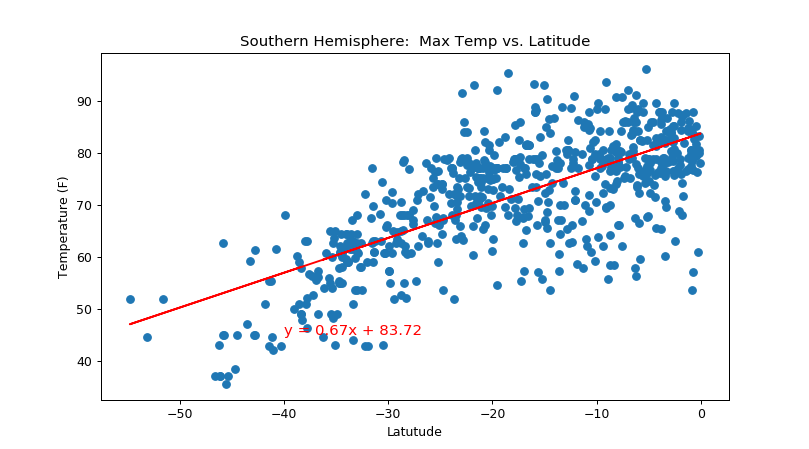

In [13]:
#############################################
#13    Regression2 South lat v Maxtemp      # 
#   a- set datapoints, title, and labels.   #
#   b- call lineplot() to produce graph.    #
#############################################

#a
x13 = south_city_weather["lat"]
y13 = south_city_weather["maxtemp"]
title13 = "Southern Hemisphere:  Max Temp vs. Latitude"
xlabel13 = "Latutude"
ylabel13 = "Temperature (F)"
xy13 = (-40,45)

#b
lineplot(x13, y13, xy13, title=title13, x_label=xlabel13, y_label=ylabel13, type="both")
plt.savefig("output_data/south_lat_vs_maxtemp.png")

Because lattitudes away from the equator see less sun, it is very evident that the further from the equator, the cooler the temperatures, whether north or south. the southern hemisphere does show a steeper gradient because of their winter creating cooler temperatures than the north.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


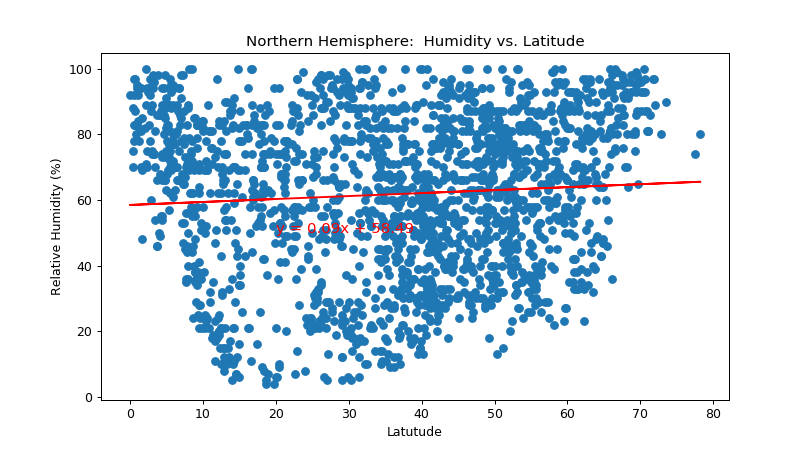

In [14]:
#############################################
#14    Regression3 North lat v Humidity     # 
#   a- set datapoints, title, and labels.   #
#   b- call lineplot() to produce graph.    #
#############################################

#a
x14 = north_city_weather["lat"]
y14 = north_city_weather["humid"]
title14 = "Northern Hemisphere:  Humidity vs. Latitude"
xlabel14 = "Latutude"
ylabel14 = "Relative Humidity (%)"
xy14 = (20,50)

#b
lineplot(x14, y14, xy14, title=title14, x_label=xlabel14, y_label=ylabel14, type="both")
plt.savefig("output_data/north_lat_vs_humid.png")

the decrease in humidity away from the equator is minor and should not be considered significant, though possibly explained by warm, wet tropical conditions closer to the equator. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


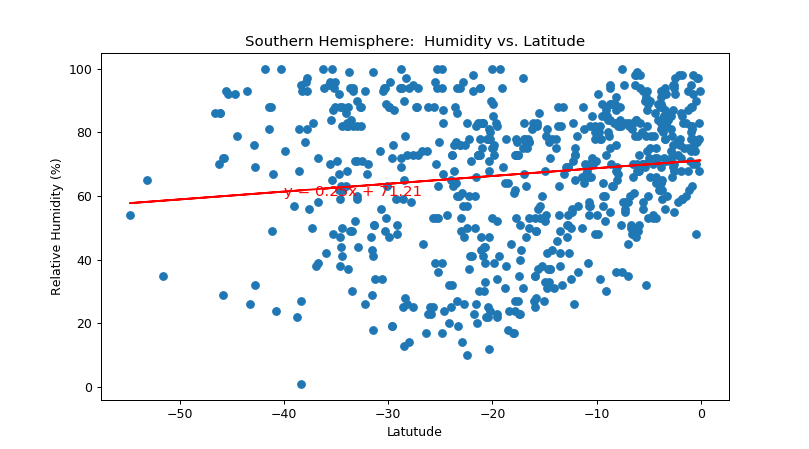

In [15]:
#############################################
#15    Regression4 South lat v Humidity     # 
#   a- set datapoints, title, and labels.   #
#   b- call lineplot() to produce graph.    #
#############################################

#a
x15 = south_city_weather["lat"]
y15 = south_city_weather["humid"]
title15 = "Southern Hemisphere:  Humidity vs. Latitude"
xlabel15 = "Latutude"
ylabel15 = "Relative Humidity (%)"
xy15 = (-40,60)

#b
lineplot(x15, y15, xy15, title=title15, x_label=xlabel15, y_label=ylabel15, type="both")
plt.savefig("output_data/south_lat_vs_humid.png")

the southern hemisphere shows an even less significant gradient of relationship between humidity and lattitude.  it is showing a very small increase in humidty further from the equator, very similiar slope, in the opposite condition as the northern.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


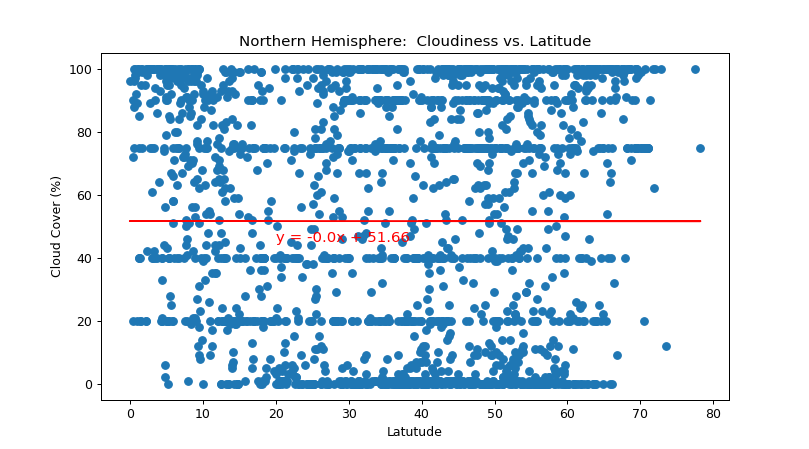

In [16]:
#############################################
#16    Regression5 North lat v Cloudiness   # 
#   a- set datapoints, title, and labels.   #
#   b- call lineplot() to produce graph.    #
#############################################

#a
x16 = north_city_weather["lat"]
y16 = north_city_weather["clouds"]
title16 = "Northern Hemisphere:  Cloudiness vs. Latitude"
xlabel16 = "Latutude"
ylabel16 = "Cloud Cover (%)"
xy16 = (20,45)

#b
lineplot(x16, y16, xy16, title=title16, x_label=xlabel16, y_label=ylabel16, type="both")
plt.savefig("output_data/north_lat_vs_clouds.png")

linear regression shows no significant coorelation between cloudiness and lattitude in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


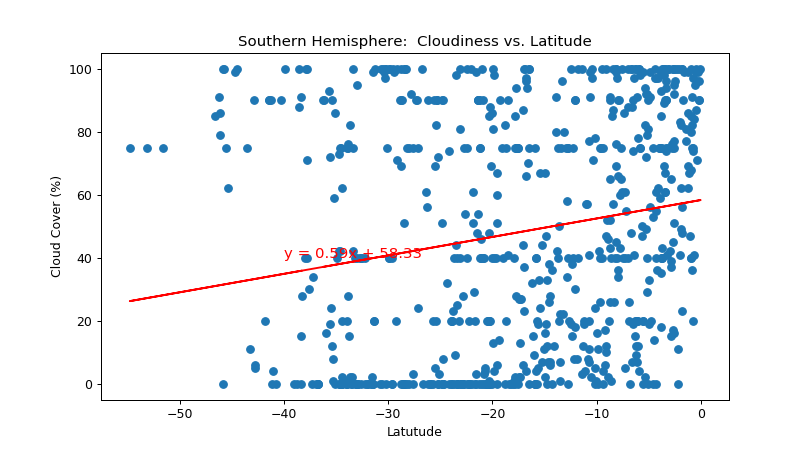

In [17]:
#############################################
#17    Regression6 South lat v Cloudiness   # 
#   a- set datapoints, title, and labels.   #
#   b- call lineplot() to produce graph.    #
#############################################

#a
x17 = south_city_weather["lat"]
y17 = south_city_weather["clouds"]
title17 = "Southern Hemisphere:  Cloudiness vs. Latitude"
xlabel17 = "Latutude"
ylabel17= "Cloud Cover (%)"
xy17 = (-40,40)

#b
lineplot(x17, y17, xy17, title=title17, x_label=xlabel17, y_label=ylabel17, type="both")
plt.savefig("output_data/south_lat_vs_clouds.png")

although the southern hemisphere shows a regression line 11 times steeper than the northern, with an increase in cloudiness further from the equator, it is unlikely that there is any causation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


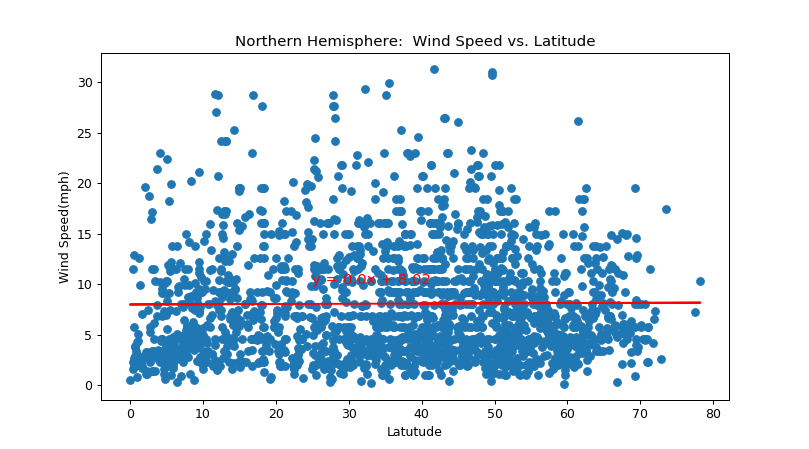

In [18]:
#############################################
#18    Regression7 North lat v WindSpeed    # 
#   a- set datapoints, title, and labels.   #
#   b- call lineplot() to produce graph.    #
#############################################

#a
x18 = north_city_weather["lat"]
y18 = north_city_weather["wind"]
title18 = "Northern Hemisphere:  Wind Speed vs. Latitude"
xlabel18 = "Latutude"
ylabel18= "Wind Speed(mph)"
xy = (25,10)

#b
lineplot(x18, y18, xy, title=title18, x_label=xlabel18, y_label=ylabel18, type="both")
plt.savefig("output_data/north_lat_vs_wind.png")

linear regression shows no significant coorelation between windspeed and lattitude in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


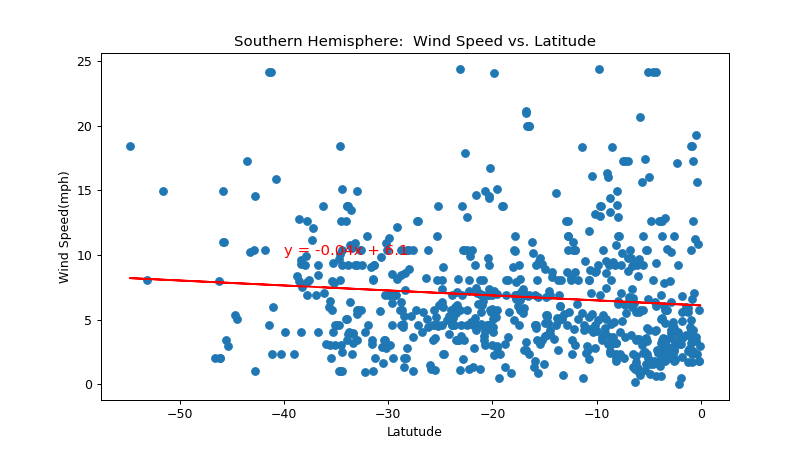

In [19]:
#############################################
#19    Regression8 South lat v Cloudiness   # 
#   a- set datapoints, title, and labels.   #
#   b- call lineplot() to produce graph.    #
#############################################

#a
x19 = south_city_weather["lat"]
y19 = south_city_weather["wind"]
title19 = "Southern Hemisphere:  Wind Speed vs. Latitude"
xlabel19 = "Latutude"
ylabel19= "Wind Speed(mph)"
xy = (-40,10)

#b
lineplot(x19, y19, xy, title=title19, x_label=xlabel19, y_label=ylabel19, type="both")
plt.savefig("output_data/south_lat_vs_wind.png")

though the regression line shows a slight decrease in wind speeds towards the equator from the southern hemisphere, there data does not support a relationship.